In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('USvideos.csv')

In [3]:
# Remove videos without features important to our analysis 
drop_col = ['video_error_or_removed', 'ratings_disabled', 'comments_disabled', 'thumbnail_link']
df.drop(columns=drop_col, inplace=True)
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'description'],
      dtype='object')

In [0]:
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m')

Cada vídeo pode aparecer mais de uma vez no dataset. Em geral, cada um tem uma data de início e alguns dias seguidos que continuou como trend. Decidimos pegar o registro do último dia como trend e remover os demais valores ambíguos.

In [0]:
# Group according video_id, take the video last trend date and remove duplicates
df_last = df.groupby('video_id').apply(lambda x: x.sort_values(['trending_date'], ascending=False).head(1))

Iremos quantificar as emoções em relação ao vídeo em função da proporção de curti, não curti, contagem de comentários em relação à quantidade de visualizações.

Average of relative likes:  2.965573877171347


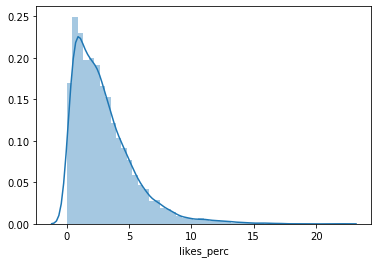

In [6]:
# Relative Likes 

df_last['likes_perc'] =(df_last['likes']/df_last['views'])*100
df_last['likes_perc'].sort_values(ascending=False).head()
mean_likes = np.mean(df_last['likes_perc'])
print('Average of relative likes: ', mean_likes)

_ = sns.distplot(df_last['likes_perc'])

Average of relative dislikes:  0.15935640471726029


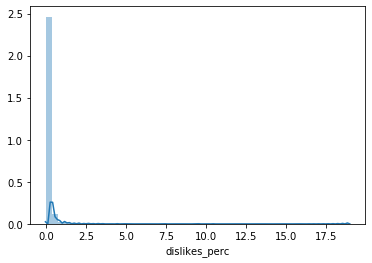

In [7]:
# Relative Dislikes

df_last['dislikes_perc'] =(df_last['dislikes']/df_last['views'])*100
df_last['dislikes_perc'].sort_values(ascending=False).head()
mean_dislikes = np.mean(df_last['dislikes_perc'])
print('Average of relative dislikes: ', mean_dislikes)

_ = sns.distplot(df_last['dislikes_perc'])

Average of relative comments:  0.4051785150755059


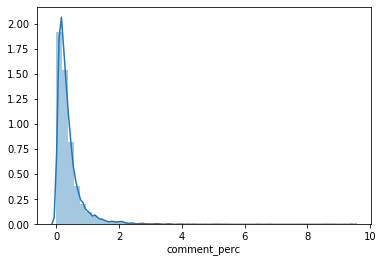

In [8]:
# Relative Discussions (amount of comments)

df_last['comment_perc'] =(df_last['comment_count']/df_last['views'])*100
df_last['comment_perc'].sort_values(ascending=False).head()
mean_comment = np.mean(df_last['comment_perc'])
print('Average of relative comments: ', mean_comment)

_ = sns.distplot(df_last['comment_perc'])

1962117.2407494884


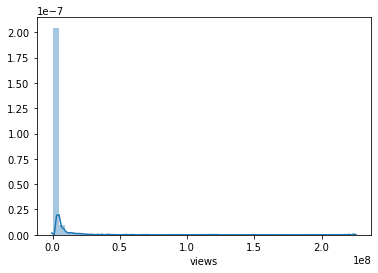

In [9]:
mean_visu = np.mean(df_last.views)
print(mean_visu)
_ = sns.distplot(df_last.views)

De acordo com as distribuições, percebe-se que mesmo entre os trend videos, poucos usuários registram sua opinião sobre o vídeo.
Iremos supor preliminarmente 4 categorias: 'loved', 'hated', 'polemic', 'neutral'

1.   Loved: videos com alta porcentagem relativa de curti e baixa de não curti.
2.   Hated: videos com baixa porcentagem relativa de curti e alta de não curti
3.   Polemic: ambas porcentagens relativas altas.
4.   Neutral: ambas porcentagens relativas baixas



In [0]:
df_last.loc[(df_last['likes_perc'] >= mean_likes) & (df_last['dislikes_perc'] < mean_dislikes), 'emotion'] = 'loved' 
df_last.loc[(df_last['likes_perc'] < mean_likes) & (df_last['dislikes_perc'] >= mean_dislikes), 'emotion'] = 'hated' 
df_last.loc[(df_last['likes_perc'] >= mean_likes) & (df_last['dislikes_perc'] >= mean_dislikes), 'emotion'] = 'polemic' 
df_last.loc[(df_last['likes_perc'] < mean_likes) & (df_last['dislikes_perc'] < mean_dislikes), 'emotion'] = 'neutral'
 

In [11]:
df_last.emotion.value_counts()

neutral    2917
loved      1956
hated       913
polemic     565
Name: emotion, dtype: int64

In [12]:
df_last.loc[df_last.emotion== 'hated', :].head()

,,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,likes_perc,dislikes_perc,comment_perc,emotion
video_id,,,,,,,,,,,,,,,,,
-2b4qSoMnKE,7431,-2b4qSoMnKE,2017-12-21,Ex-UFO program chief: We may not be alone,CNN,25,2017-12-19T20:46:33.000Z,"latest News|""Happening Now""|""CNN""|""luis elizon...",291653,3788,603,3093,"Luis Elizondo, a former military intelligence ...",1.298804,0.206753,1.060507,hated
-El8z4uy5Ac,2507,-El8z4uy5Ac,2017-11-26,The Best Movie Hell to End Up In - After Hours,Cracked,23,2017-11-20T17:00:00.000Z,"movie hells|""hercules""|""bedazzled""|""all dogs g...",639982,16519,1243,1739,The gang gets together for a frank discussion ...,2.581166,0.194224,0.271726,hated
-HoAafTYR9w,20933,-HoAafTYR9w,2018-02-28,Trump meets with students following Florida sh...,Washington Post,25,2018-02-21T22:41:17.000Z,"breaking news video|""video updates""|""live vide...",50669,411,157,503,President Trump hosts a listening session at t...,0.811147,0.309854,0.992717,hated
-JVITToppE0,777,-JVITToppE0,2017-11-17,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,17,2017-11-13T20:41:45.000Z,"Oregon|""Ducks""|""college athletics""|""college fo...",704,10,2,5,Coach Taggart addresses the media ahead of the...,1.420455,0.284091,0.710227,hated
-SIp6xSP7ds,3175,-SIp6xSP7ds,2017-11-29,Gayle King and Norah O'Donnell respond to Char...,CBS This Morning,25,2017-11-21T12:35:39.000Z,"video|""cbs""|""news""|""CBS This Morning""|""Charlie...",540227,2533,1212,1766,CBS This Morning co-hosts Norah O'Donnell and ...,0.468877,0.224350,0.326900,hated


In [13]:
df_last.loc[df_last.emotion== 'polemic', :].head()

,,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,likes_perc,dislikes_perc,comment_perc,emotion
video_id,,,,,,,,,,,,,,,,,
-5aaJJQFvOg,21947,-5aaJJQFvOg,2018-03-05,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10,2018-02-21T22:01:06.000Z,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",1168351,135280,1917,6282,Hi hi hi! here's our vid on FLASHBACK's channe...,11.578712,0.164077,0.537681,polemic
-V1Oo7srGf0,15909,-V1Oo7srGf0,2018-02-03,YOUR DATE IS HERE - Horror Short,Midnight Video,1,2018-01-29T13:00:00.000Z,"horror|""horror short""|""short""|""short film""|""my...",70891,5155,129,781,After dusting off an old Mystery Date-style bo...,7.271727,0.181970,1.101691,polemic
-W6v2_0evUU,6941,-W6v2_0evUU,2017-12-18,Why this elbow is a TIME person of the year,Vox,25,2017-12-13T12:30:00.000Z,"vox.com|""vox""|""explain""|""harvey weinstein""|""me...",485433,19128,1622,1278,The “Silence Breakers” are outliers. Most assa...,3.940400,0.334135,0.263270,polemic
-kETYvHON_I,14173,-kETYvHON_I,2018-01-25,"Why Dying is Illegal in Longyearbyen, Norway",Half as Interesting,27,2018-01-18T15:30:00.000Z,"half|""as""|""interesting""|""longyearbyen""|""norway...",597049,18464,1054,1672,Build your website for 10% off over at http://...,3.092543,0.176535,0.280044,polemic
-knTMViJqMU,20739,-knTMViJqMU,2018-02-27,Milo Takes Calls From Infowars Listeners,The Alex Jones Channel,25,2018-02-20T22:38:46.000Z,"Alex Jones Infowars|""Infowars.com""|""News Wars""...",25741,916,109,316,"Milo Yiannopoulos hosts The Alex Jones Show, t...",3.558525,0.423449,1.227614,polemic
